# Ex 4.10 Coding Etiquette and Excel Reporting

## Task - Part 1 

### 1. Importing libraries and data 

In [133]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [134]:
# Define path

path = r'/Users/andymiller/Desktop/CareerFoundry Data Analytics/4. Python/Aug 2025 Instacart Basket Analysis'

In [145]:
# Import pickle file

ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_combined.pkl'))

In [146]:
# Check to see if pricing errors are still present

ords_prods_cust['prices'].max()

99999.0

In [147]:
# Remove all the pricing errors and then redo all the graphs from this section.

ords_prods_cust.loc[ords_prods_cust['prices'] >100, 'prices'] = np.nan

In [148]:
# Check the maximum price now

ords_prods_cust['prices'].max()

25.0

### 2. Consider security implications

In [149]:
ords_prods_cust.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [150]:
ords_prods_cust.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'merge_status', 'price_range_loc',
       'busiest_day', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_item_price', 'spender_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'no_of_dependants', 'marital_status', 'income',
       '_merge'],
      dtype='object')

##### There are two columns of PII data - the 'first_name' and 'surname' columns. Since these are not actually needed for the analysis they could be removed before the analysis continues.

In [151]:
# Drop the 'first_name' and 'surname' columns

ords_prods_cust = ords_prods_cust.drop(columns = ['first_name' , 'surname'])

In [152]:
ords_prods_cust.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [153]:
# The ppi columns have now been removed from the dataframe.

### 3.  Create regional segmentations

In [154]:
# Each transaction will be categorised based on its state into a region using the following state groups:
#
#  Region 1: 'Northeast'
# 'Maine'
# 'New Hampshire'
# 'Vermont'
# 'Massachusetts'
# 'Rhode Island'
# 'Connecticut'
# 'New York'
# 'Pennsylvania'
# 'New Jersey'

#  Region 2: 'Midwest'
# 'Wisconsin'
# 'Michigan'
# 'Illinois'
# 'Indiana'
# 'Ohio'
# 'North Dakota'
# 'South Dakota'
# 'Nebraska'
# 'Kansas'
# 'Minnesota'
# 'Iowa'
# 'Missouri'

# Region 3: 'South'
# 'Delaware'
# 'Maryland'
# 'District of Columbia'
# 'Virginia'
# 'West Virginia'
# 'North Carolina'
# 'South Carolina'
# 'Georgia'
# 'Florida'
# 'Kentucky'
# 'Tennessee'
# 'Mississippi'
# 'Alabama'
# 'Oklahoma'
# 'Texas'
# 'Arkansas'
# 'Louisiana'

# Region 4: 'West'
# 'Idaho'
# 'Montana'
# 'Wyoming'
# 'Nevada'
# 'Utah'
# 'Colorado'
# 'Arizona'
# 'New Mexico'
# 'Alaska'
# 'Washington'
# 'Oregon'
# 'California'
# 'Hawaii'

In [155]:
ords_prods_cust.loc[(ords_prods_cust['state'] == 'Maine') | 
                    (ords_prods_cust['state'] == 'New Hampshire') | 
                    (ords_prods_cust['state'] == 'Vermont') | 
                    (ords_prods_cust['state'] == 'Massachusetts') | 
                    (ords_prods_cust['state'] == 'Rhode Island') | 
                    (ords_prods_cust['state'] == 'Connecticut') | 
                    (ords_prods_cust['state'] == 'New York') | 
                    (ords_prods_cust['state'] == 'Pennsylvania') | 
                    (ords_prods_cust['state'] == 'New Jersey'), 'region'] = 'Northeast'

In [156]:
ords_prods_cust.loc[(ords_prods_cust['state'] == 'Wisconsin') | 
                    (ords_prods_cust['state'] == 'Michigan') | 
                    (ords_prods_cust['state'] == 'Illinois') | 
                    (ords_prods_cust['state'] == 'Indiana') | 
                    (ords_prods_cust['state'] == 'Ohio') | 
                    (ords_prods_cust['state'] == 'North Dakota') | 
                    (ords_prods_cust['state'] == 'South Dakota') | 
                    (ords_prods_cust['state'] == 'Nebraska') | 
                    (ords_prods_cust['state'] == 'Kansas') | 
                    (ords_prods_cust['state'] == 'Minnesota') | 
                    (ords_prods_cust['state'] == 'Iowa') | 
                    (ords_prods_cust['state'] == 'Missouri'), 'region'] = 'Midwest'

In [157]:
ords_prods_cust.loc[(ords_prods_cust['state'] == 'Delaware') | 
                    (ords_prods_cust['state'] == 'Maryland') | 
                    (ords_prods_cust['state'] == 'District of Columbia') | 
                    (ords_prods_cust['state'] == 'Virginia') | 
                    (ords_prods_cust['state'] == 'West Virginia') | 
                    (ords_prods_cust['state'] == 'North Carolina') | 
                    (ords_prods_cust['state'] == 'South Carolina') | 
                    (ords_prods_cust['state'] == 'Georgia') | 
                    (ords_prods_cust['state'] == 'Florida') | 
                    (ords_prods_cust['state'] == 'Kentucky') | 
                    (ords_prods_cust['state'] == 'Tennessee') | 
                    (ords_prods_cust['state'] == 'Mississippi') | 
                    (ords_prods_cust['state'] == 'Alabama') | 
                    (ords_prods_cust['state'] == 'Oklahoma') | 
                    (ords_prods_cust['state'] == 'Texas') | 
                    (ords_prods_cust['state'] == 'Arkansas') | 
                    (ords_prods_cust['state'] == 'Louisiana'), 'region'] = 'South'

In [158]:
ords_prods_cust.loc[(ords_prods_cust['state'] == 'Idaho') | 
                    (ords_prods_cust['state'] == 'Montana') | 
                    (ords_prods_cust['state'] == 'Wyoming') | 
                    (ords_prods_cust['state'] == 'Nevada') | 
                    (ords_prods_cust['state'] == 'Utah') | 
                    (ords_prods_cust['state'] == 'Colorado') | 
                    (ords_prods_cust['state'] == 'Arizona') | 
                    (ords_prods_cust['state'] == 'New Mexico') | 
                    (ords_prods_cust['state'] == 'Alaska') | 
                    (ords_prods_cust['state'] == 'Washington') | 
                    (ords_prods_cust['state'] == 'Oregon') | 
                    (ords_prods_cust['state'] == 'California') | 
                    (ords_prods_cust['state'] == 'Hawaii'), 'region'] = 'West'

In [159]:
# Check that the region flag was added successfully

ords_prods_cust.head(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income,_merge,region
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
5,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
6,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
7,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
8,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
9,2398795,1,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [160]:
ords_prods_cust['region'].value_counts()

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [161]:
ords_prods_cust.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'merge_status', 'price_range_loc',
       'busiest_day', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_item_price', 'spender_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependants', 'marital_status', 'income', '_merge', 'region'],
      dtype='object')

In [162]:
# Compare spending habits between different U.S. regions
# Create crosstab with 'region' and and 'spender_flag'

crosstab = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spender_flag'] ,dropna = False)

In [163]:
crosstab.to_clipboard()

##### Looking at the crosstab between 'region' and 'spender_flag', then calculating the percentage of high spenders we see that the midwest has a slightly higher percentage of 'high spenders' at 2.1% with the South, West and Northeast regions only slightly behind around with around 1.9% of customers being 'high spenders'.

##### Region......High spender..Low spender.....% high spenders
##### Midwest.....155975........7441350.............2.05
##### Northeast...108225........5614511.............1.93
##### South..........209691........10582194..........1.98
##### West...........160354........8132559............1.99

##### Another way to look at this is that 24.6% of total number of high spending customers are in the Midwest, 17.1% in the Northeast, 33.1% in the South and 25.3% in the West.

### 4. Exclude low-activity customers from the data 

In [164]:
# Create an exclusion flag for customers who have less than 5 orders.

In [165]:
ords_prods_cust[['order_number', 'max_order']].head()

,order_number,max_order
0,1,10
1,1,10
2,1,10
3,1,10
4,1,10


In [166]:
ords_prods_cust.loc[ords_prods_cust['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [167]:
ords_prods_cust.loc[ords_prods_cust['max_order'] >= 5, 'activity_flag'] = 'High activity'

In [168]:
ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,no_of_dependants,marital_status,income,_merge,region,activity_flag
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity
1,2539329,1,1,2,8,0.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity
2,2539329,1,1,2,8,0.0,12427,3,0,Original Beef Jerky,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity
3,2539329,1,1,2,8,0.0,26088,4,0,Aged White Cheddar Popcorn,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity
4,2539329,1,1,2,8,0.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High activity


In [169]:
ords_prods_cust.shape

(32404859, 33)

In [170]:
# Check count of 'Low activity' and ' High activity'

ords_prods_cust['activity_flag'].value_counts()

activity_flag
High activity    30964564
Low activity      1440295
Name: count, dtype: int64

In [171]:
# Filter out the low activity customers 

ords_prods_cust_high = ords_prods_cust[ords_prods_cust['activity_flag'] == "High activity"]

In [172]:
# Check counts of each status again

ords_prods_cust_high['activity_flag'].value_counts()

activity_flag
High activity    30964564
Name: count, dtype: int64

In [173]:
ords_prods_cust_high.shape

(30964564, 33)

In [174]:
#  Export the filtered dataframe as a pickle file

ords_prods_cust_high.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_high.pkl'))

### 5. Creating customer profiles (revised version)

#####  Note:  I tried to split the customers into profiles in several different ways but each time I found that the profiles were not particularly useful and left too many customers in the "Other" category or were too literal and it seemed like the customers were just being categorised into one of four groups.  If you want to see the early attempts then they can be found in the script Ex4.10_v2.

##### Below is the 4th attempt which was then used to produce the rest of the analysis.

In [175]:
#  Attempt 4

In [177]:
#  Rename 'no_of_dependants' column to fix earlier typo

ords_prods_cust_high.rename(columns = {'no_of_dependants' : 'no_of_dependents'}, inplace = True)

/var/folders/w2/ktpt6z_d1353vv2y_fgqj5cm0000gn/T/ipykernel_61302/3931540981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_high.rename(columns = {'no_of_dependants' : 'no_of_dependents'}, inplace = True)


In [179]:
# Check this worked

ords_prods_cust_high.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'merge_status', 'price_range_loc',
       'busiest_day', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_item_price', 'spender_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependents', 'marital_status', 'income', '_merge', 'region',
       'activity_flag'],
      dtype='object')

In [180]:
#  Create a customer profile column 'profile_4' according to the rules below and name each profile.

ords_prods_cust_high.loc[(ords_prods_cust_high['age'] < 35) &
                         (ords_prods_cust_high['no_of_dependents'] == 0), 'profile_4'] = 'Young independents'

/var/folders/w2/ktpt6z_d1353vv2y_fgqj5cm0000gn/T/ipykernel_61302/1408520579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_high.loc[(ords_prods_cust_high['age'] < 35) &


In [181]:
ords_prods_cust_high.loc[(ords_prods_cust_high['age'] < 50) &
                         (ords_prods_cust_high['no_of_dependents'] <= 1) &
                         (ords_prods_cust_high['income'] >= 96800), 'profile_4'] = 'Affluent professionals'

In [182]:
ords_prods_cust_high.loc[(ords_prods_cust_high['age'] < 45) &
                         (ords_prods_cust_high['no_of_dependents'] >= 1), 'profile_4'] = 'Growing families'

In [183]:
ords_prods_cust_high.loc[(ords_prods_cust_high['age'] >= 45) &
                         (ords_prods_cust_high['no_of_dependents'] >= 1), 'profile_4'] = 'Established families'

In [184]:
ords_prods_cust_high.loc[(ords_prods_cust_high['age'] >= 55) &
                         (ords_prods_cust_high['no_of_dependents'] == 0),'profile_4'] = 'Empty nesters'

In [185]:
# Check counts of profiles that have been assigned

ords_prods_cust_high['profile_4'].value_counts(dropna=False)

profile_4
Established families      13412326
Growing families           9812557
Empty nesters              3273722
Young independents         1899532
NaN                        1536250
Affluent professionals     1030177
Name: count, dtype: int64

In [186]:
#  Replace all remaining NaN values with 'Other'

ords_prods_cust_high['profile_4'] = ords_prods_cust_high['profile_4'].fillna('Other')

/var/folders/w2/ktpt6z_d1353vv2y_fgqj5cm0000gn/T/ipykernel_61302/292514007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_cust_high['profile_4'] = ords_prods_cust_high['profile_4'].fillna('Other')


In [187]:
#  Confirm the NaN values have been replaced and check count again.

ords_prods_cust_high['profile_4'].value_counts(dropna=False)

profile_4
Established families      13412326
Growing families           9812557
Empty nesters              3273722
Young independents         1899532
Other                      1536250
Affluent professionals     1030177
Name: count, dtype: int64

In [188]:
#  Have a look at some of the rows that have been designated 'Other'

ords_prods_cust_high.loc[ords_prods_cust_high['profile_4'] == 'Other'].sample(10)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,no_of_dependents,marital_status,income,_merge,region,activity_flag,profile_4
3922358,1490976,24945,4,2,10,9.0,29363,11,1,Cinnamon Cereal,...,Colorado,37,9/24/2019,0,single,56847,both,West,High activity,Other
17643784,1071231,111669,57,2,12,7.0,39040,1,0,Organic Sliced Crimini Mushrooms,...,Ohio,52,1/10/2020,0,single,165124,both,Midwest,High activity,Other
29052355,1392473,184711,5,5,16,21.0,34995,8,0,Strawberry Thumbprint Cookies,...,Rhode Island,41,10/11/2017,0,single,30243,both,Northeast,High activity,Other
3482670,557887,22308,24,4,10,3.0,16185,9,1,Sharp Cheddar Cheese,...,Montana,52,6/16/2019,0,single,169745,both,West,High activity,Other
9932492,2341713,63208,4,0,18,8.0,26668,5,0,Cannellini White Kidney Beans No Salt Added,...,Louisiana,35,6/26/2019,0,single,79945,both,South,High activity,Other
9858625,1782073,62728,15,3,10,5.0,8518,13,1,Organic Red Onion,...,West Virginia,53,7/20/2017,0,single,147121,both,South,High activity,Other
31039734,1138134,197357,11,0,9,7.0,37766,10,1,XL Emerald White Seedless Grapes,...,Missouri,54,3/18/2019,0,single,78900,both,Midwest,High activity,Other
30932924,2269623,196676,14,4,15,11.0,30489,6,1,Original Hummus,...,Maine,46,5/27/2019,0,single,86286,both,Northeast,High activity,Other
10723926,2650941,68077,13,1,6,5.0,37067,3,1,Organic Banana,...,Tennessee,44,2/8/2018,0,single,65935,both,South,High activity,Other
8472310,2513200,53727,1,4,13,0.0,41290,15,0,Lemonade,...,New Hampshire,37,5/16/2019,0,single,64505,both,Northeast,High activity,Other


### 6. Visualisation showing distribution of profiles

In [304]:
# Group by user_id and profile_4 to keep one row per customer
unique_customers = (ords_prods_cust_high[['user_id', 'profile_4']].drop_duplicates())

unique_customers.shape

(162631, 2)

In [306]:
ords_prods_cust_high.shape

(30964564, 35)

In [305]:
unique_customers['profile_4'].value_counts()

profile_4
Established families      70817
Growing families          51087
Empty nesters             17033
Young independents        10119
Other                      8423
Affluent professionals     5152
Name: count, dtype: int64

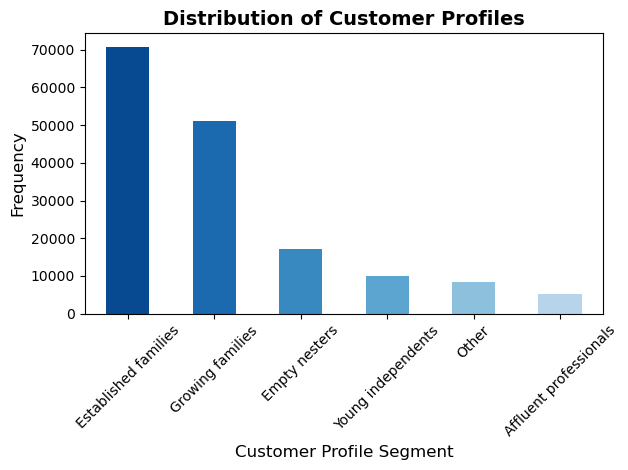

In [307]:

# Plot bar graph showing distribution of profiles

# Put values in ascending order
counts = unique_customers['profile_4'].value_counts().sort_values(ascending=False)


# Generage colours
colors = plt.cm.Blues(np.linspace(0.9, 0.3, len(counts)))

# Plot bar chart
bar = counts.plot.bar(color=colors)

plt.title('Distribution of Customer Profiles', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Customer Profile Segment', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Save bar chart
fig =bar.get_figure()
fig.savefig(os.path.join(path, '04 Analysis','Visualisations','Bar_chart_of_profiles_v4_fix.png'),
            bbox_inches='tight', dpi=300)

plt.show()

### 7.  Aggregate the max, mean and min variables on a customer-profile level for usage frequency and expenditure 


In [190]:
# Group by profile and aggregate the 'order_number' and 'prices' values for each profile

agg_profile = ords_prods_cust_high.groupby('profile_4').agg({
    'order_number': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min']})

agg_profile

order_number                prices               
                                max       mean min    max      mean  min
profile_4                                                               
Affluent professionals           99  17.726185   1   25.0  7.954010  1.0
Empty nesters                    99  18.168708   1   25.0  7.795812  1.0
Established families             99  17.733162   1   25.0  7.791170  1.0
Growing families                 99  17.874533   1   25.0  7.790619  1.0
Other                            99  17.913605   1   25.0  7.695540  1.0
Young independents               99  17.756167   1   25.0  7.765642  1.0

### 8+9. Comparing customer profiles across regions and departments and produce suitable charts to illustrate results

#### a. Average Price of Items Purchased Per Profile and Region

In [197]:
# Group by region and then by profile
agg_profile = ords_prods_cust_high.groupby(['region','profile_4']).agg({
    'order_number': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min']})

agg_profile

order_number                prices            \
                                          max       mean min    max      mean   
region    profile_4                                                             
Midwest   Affluent professionals           99  17.863569   1   25.0  7.968003   
          Empty nesters                    99  18.315514   1   25.0  7.778643   
          Established families             99  17.361599   1   25.0  7.789638   
          Growing families                 99  17.681249   1   25.0  7.794449   
          Other                            99  17.699215   1   25.0  7.700024   
          Young independents               99  17.424417   1   25.0  7.798213   
Northeast Affluent professionals           99  16.628148   1   25.0  7.929610   
          Empty nesters                    99  18.138390   1   25.0  7.815467   
          Established families             99  17.993319   1   25.0  7.781742   
          Growing families                 99  17.983292   1   25.0  7.777751   
          Other                            99  17.442155   1   25.0  7.666057   
          Young independents               99  17.712677   1   25.0  7.757073   
South     Affluent professionals           99  18.060055   1   25.0  7.965094   
          Empty nesters                    99  18.150098   1   25.0  7.800507   
          Established families             99  17.675239   1   25.0  7.794515   
          Growing families                 99  17.966455   1   25.0  7.794057   
          Other                            99  17.602939   1   25.0  7.690484   
          Young independents               99  17.946790   1   25.0  7.772396   
West      Affluent professionals           99  17.808323   1   25.0  7.939287   
          Empty nesters                    99  18.080077   1   25.0  7.791804   
          Established families             99  17.964742   1   25.0  7.794795   
          Growing families                 99  17.856860   1   25.0  7.791406   
          Other                            99  18.789186   1   25.0  7.716062   
          Young independents               99  17.825569   1   25.0  7.734319   

                                       
                                  min  
region    profile_4                    
Midwest   Affluent professionals  1.0  
          Empty nesters           1.0  
          Established families    1.0  
          Growing families        1.0  
          Other                   1.0  
          Young independents      1.0  
Northeast Affluent professionals  1.0  
          Empty nesters           1.0  
          Established families    1.0  
          Growing families        1.0  
          Other                   1.0  
          Young independents      1.0  
South     Affluent professionals  1.0  
          Empty nesters           1.0  
          Established families    1.0  
          Growing families        1.0  
          Other                   1.0  
          Young independents      1.0  
West      Affluent professionals  1.0  
          Empty nesters           1.0  
          Established families    1.0  
          Growing families        1.0  
          Other                   1.0  
          Young independents      1.0

In [178]:
# Group by profile and then by region
agg_profile = ords_prods_cust_high.groupby(['profile_4','region']).agg({
    'order_number': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min']})

agg_profile

order_number                prices            \
                                          max       mean min    max      mean   
profile_4              region                                                   
Affluent professionals Midwest             99  17.800129   1   25.0  7.951822   
                       Northeast           99  16.027095   1   25.0  7.950249   
                       South               99  18.527292   1   25.0  7.967046   
                       West                99  18.063805   1   25.0  7.935812   
Empty nesters          Midwest             99  18.315514   1   25.0  7.778643   
                       Northeast           99  18.138390   1   25.0  7.815467   
                       South               99  18.150098   1   25.0  7.800507   
                       West                99  18.080077   1   25.0  7.791804   
Established families   Midwest             99  17.361599   1   25.0  7.789638   
                       Northeast           99  17.993319   1   25.0  7.781742   
                       South               99  17.675239   1   25.0  7.794515   
                       West                99  17.964742   1   25.0  7.794795   
Growing families       Midwest             99  17.681249   1   25.0  7.794449   
                       Northeast           99  17.983292   1   25.0  7.777751   
                       South               99  17.966455   1   25.0  7.794057   
                       West                99  17.856860   1   25.0  7.791406   
Other                  Midwest             99  17.699215   1   25.0  7.700024   
                       Northeast           99  17.442155   1   25.0  7.666057   
                       South               99  17.602939   1   25.0  7.690484   
                       West                99  18.789186   1   25.0  7.716062   
Young independents     Midwest             99  17.496214   1   25.0  7.822075   
                       Northeast           99  17.850365   1   25.0  7.761418   
                       South               99  17.751810   1   25.0  7.786421   
                       West                99  17.719587   1   25.0  7.751330   

                                       
                                  min  
profile_4              region          
Affluent professionals Midwest    1.0  
                       Northeast  1.0  
                       South      1.0  
                       West       1.0  
Empty nesters          Midwest    1.0  
                       Northeast  1.0  
                       South      1.0  
                       West       1.0  
Established families   Midwest    1.0  
                       Northeast  1.0  
                       South      1.0  
                       West       1.0  
Growing families       Midwest    1.0  
                       Northeast  1.0  
                       South      1.0  
                       West       1.0  
Other                  Midwest    1.0  
                       Northeast  1.0  
                       South      1.0  
                       West       1.0  
Young independents     Midwest    1.0  
                       Northeast  1.0  
                       South      1.0  
                       West       1.0

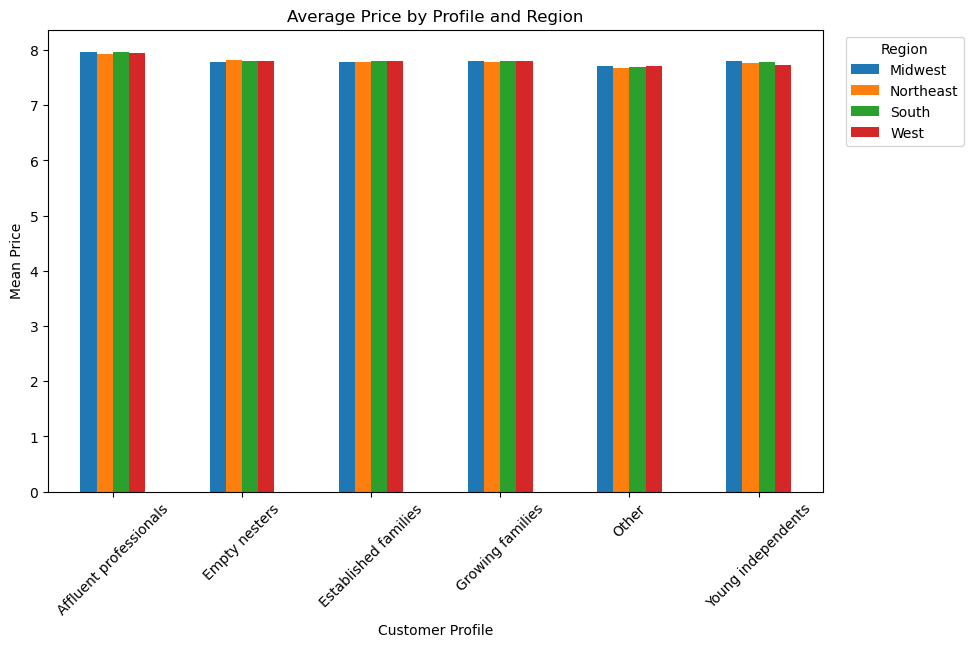

In [198]:
# Flatten columns
agg_profile.columns = ['_'.join(col).strip() for col in agg_profile.columns.values]
agg_profile = agg_profile.reset_index()

# Plot mean price
bar_2 = agg_profile.pivot(index='profile_4', columns='region', values='prices_mean').plot.bar(figsize=(10,6))

plt.title("Average Price by Profile and Region")
plt.ylabel("Mean Price")
plt.xlabel("Customer Profile")
plt.xticks(rotation=45)
plt.legend(title="Region", loc='upper left', bbox_to_anchor=(1.02, 1))

# Save the bar chart
fig = bar_2.get_figure()
fig.savefig(os.path.join(path, '04 Analysis','Visualisations','average_price_by_profile_region_fix.png'),
            bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

#####  There does not seem to be much variation in the average price of items purchased across profiles and regions. 

#### b. Average Total Spent Per Profile and Region

In [199]:
#  Work out the total amount spent for each customer

customer_spend = ords_prods_cust_high.groupby(['user_id', 'profile_4', 'region'])['prices'].sum().reset_index()

In [200]:
customer_spend.describe()

,user_id,prices
count,162631.000000,162631.000000
mean,103082.597887,1483.076631
std,59529.254972,1701.484720
min,1.000000,5.000000
25%,51579.500000,453.800000
50%,103059.000000,886.800000
75%,154644.500000,1819.000000
max,206209.000000,26394.900000


##### Looking for reason why all the spending figures seemed off

In [110]:
#  Now find the mean amount spent by customers from each profile and region

big_spender = customer_spend['prices']>2104000

In [112]:
big_spender = customer_spend[customer_spend['prices'] > 2104000]
print(big_spender)


        user_id         profile_4   region     prices
121083   153527  Growing families  Midwest  2104114.1


In [122]:
big_spender_2 = ords_prods_cust_high[ords_prods_cust_high['user_id']==153527]

big_spender_2.groupby('order_id')['prices'].sum()




order_id
185413     100064.0
197617     100064.4
273148         89.4
298698     100129.8
388790        135.9
463465     100021.6
507811        159.1
507927     100152.6
569912        119.9
575124     100291.4
934500     100123.5
963814     100029.1
981353         13.6
1054379        50.4
1191562        64.1
1224990       134.6
1312270    100074.6
1366674        25.3
1547976        31.2
1708621    100119.1
1789662        72.2
1841780    100273.1
2096246        99.3
2255192    100220.7
2319814    100151.4
2404967    100167.6
2463435    100032.4
2528414    100087.0
2574899    100148.2
2784072       120.5
2865590    100155.8
2866321       119.7
2973659    100164.0
3076113        42.5
3107354       119.6
3108844    100104.5
3165067    100071.6
3352157        70.4
Name: prices, dtype: float64

In [126]:
big_order= ords_prods_cust_high[ords_prods_cust_high['order_id']==185413]

In [131]:

big_order[['product_name', 'prices']]

,product_name,prices
24162774,Organic Creamy Tomato Soup,13.1
24162775,Organic Low Fat Black Bean Vegetable Soup,9.5
24162776,Yellow Onions,1.2
24162777,2 % Reduced Fat Milk,99999.0
24162778,Tomato Kumato,7.0
24162779,Sweet Butter Salad,1.2
24162780,Orange Bell Pepper,14.8
24162781,Original Nooks & Crannies English Muffins,6.7
24162782,Kiwi,3.7
24162783,Yellow Bell Pepper,6.5


#### c. Average spend by Region and Profile

In [201]:
avg_spend

,profile_4,region,prices
0,Empty nesters,Midwest,2097.870379
1,Empty nesters,Northeast,2622.449281
2,Empty nesters,South,2252.417090
3,Empty nesters,West,2164.747717
4,Established families,Midwest,2268.929042
5,Established families,Northeast,2284.413880
6,Established families,South,2222.298579
7,Established families,West,2235.532555
8,Growing families,Midwest,2489.148008
9,Growing families,Northeast,2121.916040


In [202]:
# Create pivot for use in bar chart

avg_spend_pivot = avg_spend.pivot(index='profile_4', columns='region', values='prices')

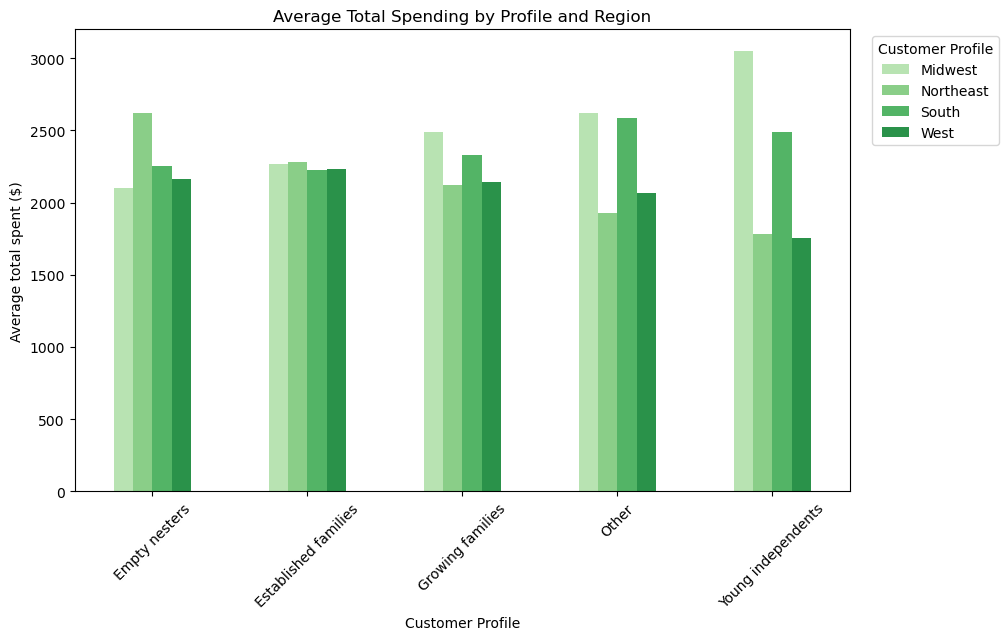

In [204]:
# Plot bar chart of Average spending by Profile and Region

# Create colour palette for bars
colors = plt.cm.Greens(np.linspace(0.3, 1.0, len(counts)))

bar_2 = avg_spend_pivot.plot.bar(color=colors, figsize=(10,6))

plt.title("Average Total Spending by Profile and Region")
plt.ylabel("Average total spent ($)")
plt.xlabel("Customer Profile")
plt.xticks(rotation=45)
plt.legend(title="Customer Profile", loc='upper left', bbox_to_anchor=(1.02, 1))

# Save the bar chart
fig = bar_2.get_figure()
fig.savefig(os.path.join(path, '04 Analysis','Visualisations','average_total_spent_by_region_and_profile_fix.png'),
            bbox_inches='tight', dpi=300)


In [205]:
avg_spend_pivot_2 = avg_spend.pivot(index='region', columns='profile_4', values='prices')

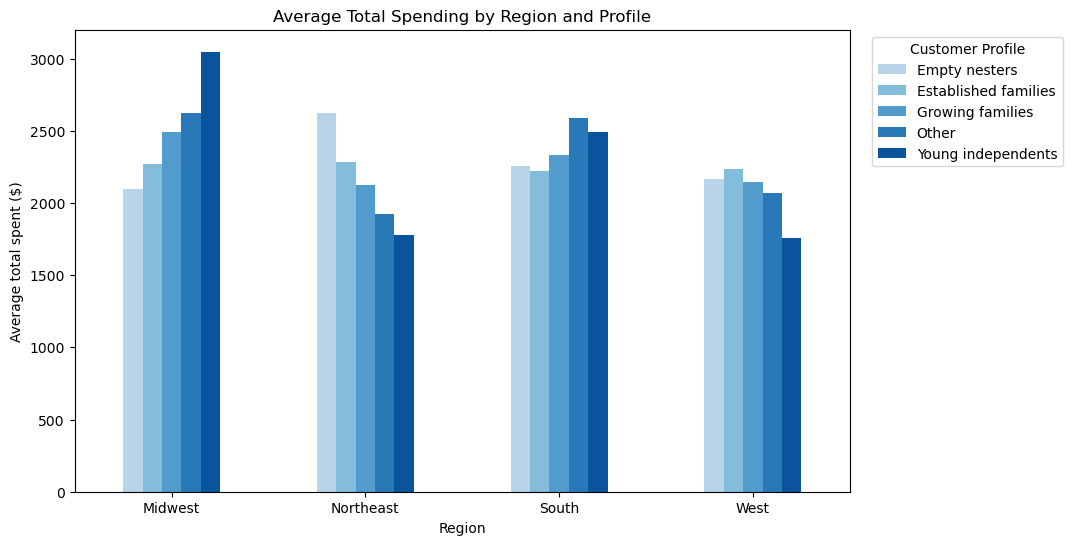

In [206]:
# This information might be better presented with the profiles grouped by region instead

# Create bar chart of Average spending by Region and Profile


# Create colour palette for bars
colors = plt.cm.Blues(np.linspace(0.3, 1.0, len(counts)))

# Plot bar chart
bar_3 = avg_spend_pivot_2.plot.bar(color=colors, figsize=(10,6))

plt.title("Average Total Spending by Region and Profile")
plt.ylabel("Average total spent ($)")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.legend(title="Customer Profile", loc='upper left', bbox_to_anchor=(1.02, 1))

# Save the bar chart
fig = bar_3.get_figure()
fig.savefig(os.path.join(path, '04 Analysis','Visualisations','average_total_spent_by_profile_and_region_fix.png'),
            bbox_inches='tight', dpi=300)

# Show the plot
plt.show()



In [207]:
# Calculate the totals for each region without the profile classifications

avg_spend_all_profiles = customer_spend.groupby(['region'])['prices'].mean().reset_index().rename(columns={'prices': 'mean_total_spend_per_customer'})



avg_spend_all_profiles

,region,mean_total_spend_per_customer
0,Midwest,1474.218621
1,Northeast,1487.592271
2,South,1482.780455
3,West,1488.547188


#### d. Top 5 departments Per Customer Profile

In [209]:
# Now look at which departments are most popular for each customer profile

# import departments_wrangled.csv 

depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [210]:
depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [211]:
#  Rename 'Unnamed: 0' column as 'department_id' for consistency

depts.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [212]:
#  Count the departments purchases by profile

dept_counts = ords_prods_cust_high.groupby(['profile_4', 'department_id']).size().reset_index(name = 'count')

In [213]:
# Create "id - name" label
depts['dept_label'] = depts['department_id'].astype(str) + " - " + depts['department']

# Merge into counts
dept_counts = dept_counts.merge(depts[['department_id', 'dept_label']], on='department_id', how='left')


In [214]:
depts

,department_id,department,dept_label
0,1,frozen,1 - frozen
1,2,other,2 - other
2,3,bakery,3 - bakery
3,4,produce,4 - produce
4,5,alcohol,5 - alcohol
5,6,international,6 - international
6,7,beverages,7 - beverages
7,8,pets,8 - pets
8,9,dry goods pasta,9 - dry goods pasta
9,10,bulk,10 - bulk


In [375]:
#  Take the top 5 departments per profile

top_depts = (dept_counts.sort_values(['profile_4', 'count'], ascending=[True, False]).groupby('profile_4').head(5))

top_depts

,profile_4,department_id,count,dept_label,dept_label_adjusted
3,Affluent professionals,4,305222,4 - produce,4 - produce
15,Affluent professionals,16,174334,16 - dairy eggs,16 - dairy eggs
6,Affluent professionals,7,82894,7 - beverages,7 - beverages
18,Affluent professionals,19,79033,19 - snacks,19 - snacks
0,Affluent professionals,1,70883,1 - frozen,1 - frozen
24,Empty nesters,4,961635,4 - produce,4 - produce
36,Empty nesters,16,550163,16 - dairy eggs,16 - dairy eggs
39,Empty nesters,19,292067,19 - snacks,19 - snacks
27,Empty nesters,7,272818,7 - beverages,7 - beverages
21,Empty nesters,1,226557,1 - frozen,1 - frozen


In [376]:
pivot_top_depts = top_depts.pivot(index = 'profile_4', columns = 'dept_label', values = 'count')

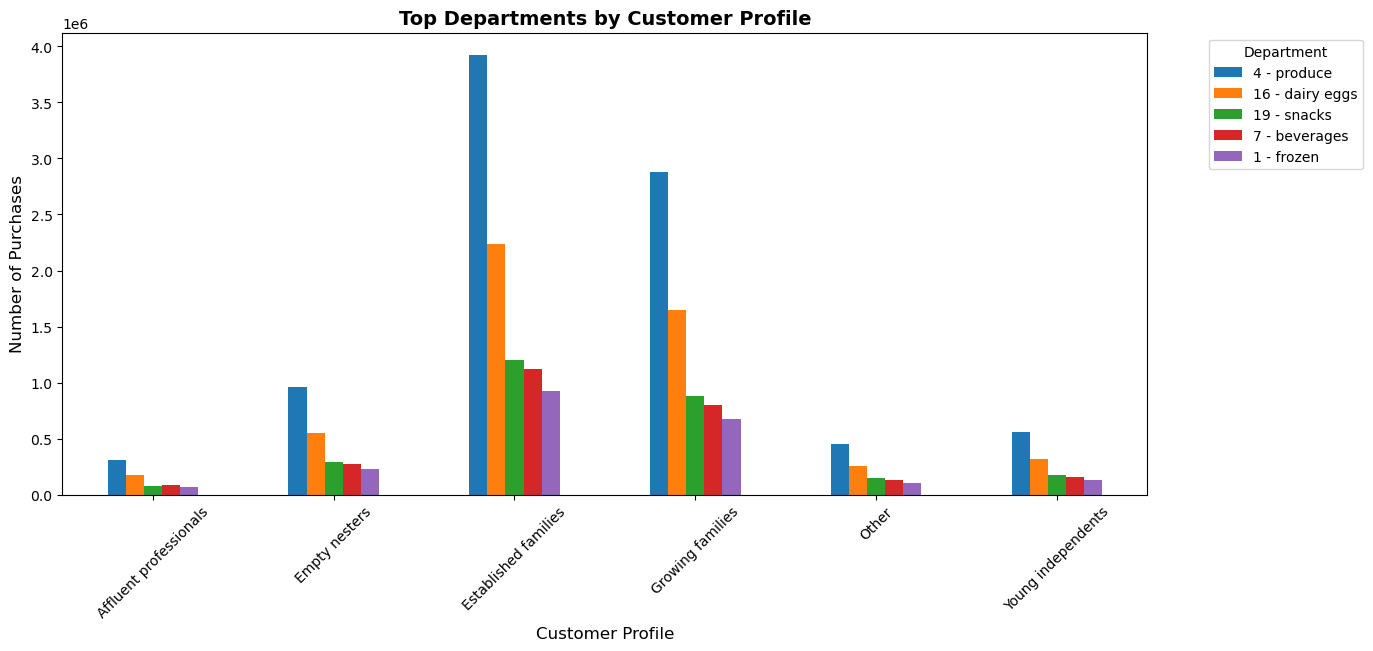

In [377]:
# Create bar chart of top 5 departments for each profile.

# Reorder columns within each profile in decending order
column_order = pivot_top_depts.sum(axis=0).sort_values(ascending=False).index
pivot_top_depts_sorted= pivot_top_depts[column_order]


# plot bar graph
bar_5 = pivot_top_depts_sorted.plot.bar(figsize=(14,6))

plt.title("Top Departments by Customer Profile",fontsize=14, fontweight='bold')
plt.ylabel("Number of Purchases", fontsize=12)
plt.xlabel("Customer Profile", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left')



# Save the bar chart
fig = bar_5.get_figure()
fig.savefig(os.path.join(path, '04 Analysis','Visualisations','top_departments_by_profile_5_fix.png'),
            bbox_inches='tight', dpi=300)

plt.show()

#####  While the top 5 departments are the same for each of the profiles, the proportions appear to be quite similar as well.  To see this better a normalised graph showing the percentages might be better.

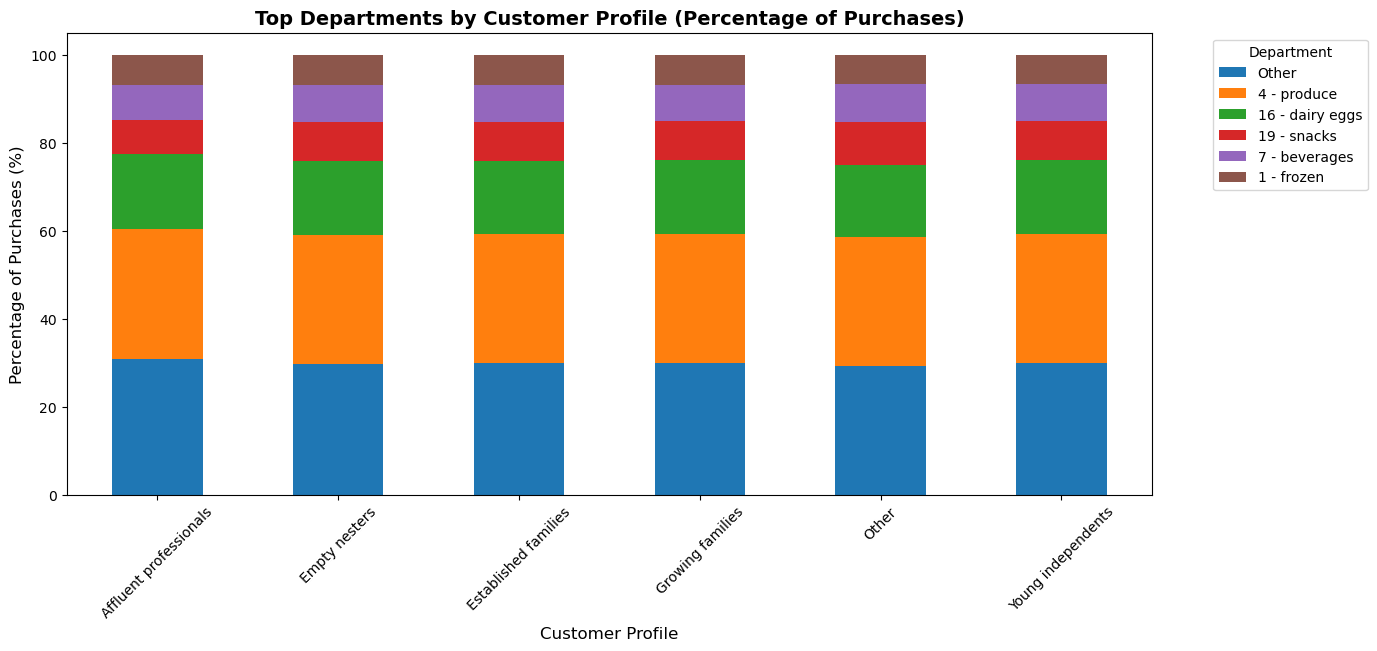

In [399]:
# Normalize so each profile sums to 100%
pivot_top_depts_pct = pivot_top_depts.div(pivot_top_depts.sum(axis=1), axis=0) * 100

# Reorder columns within each profile in descending order of overall contribution
column_order = pivot_top_depts_pct.sum(axis=0).sort_values(ascending=False).index
pivot_top_depts_sorted = pivot_top_depts_pct[column_order]

# Plot bar graph
bar_5 = pivot_top_depts_sorted.plot.bar(figsize=(14,6), stacked=True)

plt.title("Top Departments by Customer Profile (Percentage of Purchases)", fontsize=14, fontweight='bold')
plt.ylabel("Percentage of Purchases (%)", fontsize=12)
plt.xlabel("Customer Profile", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the bar chart
fig = bar_5.get_figure()
fig.savefig(os.path.join(path, '04 Analysis','Visualisations','top_departments_by_profile_percent.png'),
            bbox_inches='tight', dpi=300)

plt.show()


#### e. Heatmap of Region against Profile

In [330]:
# Get unique customers with their profile and region

unique_customers_2 = (ords_prods_cust_high[['user_id', 'profile_4', 'region']].drop_duplicates())

unique_customers_2.shape

(162631, 3)

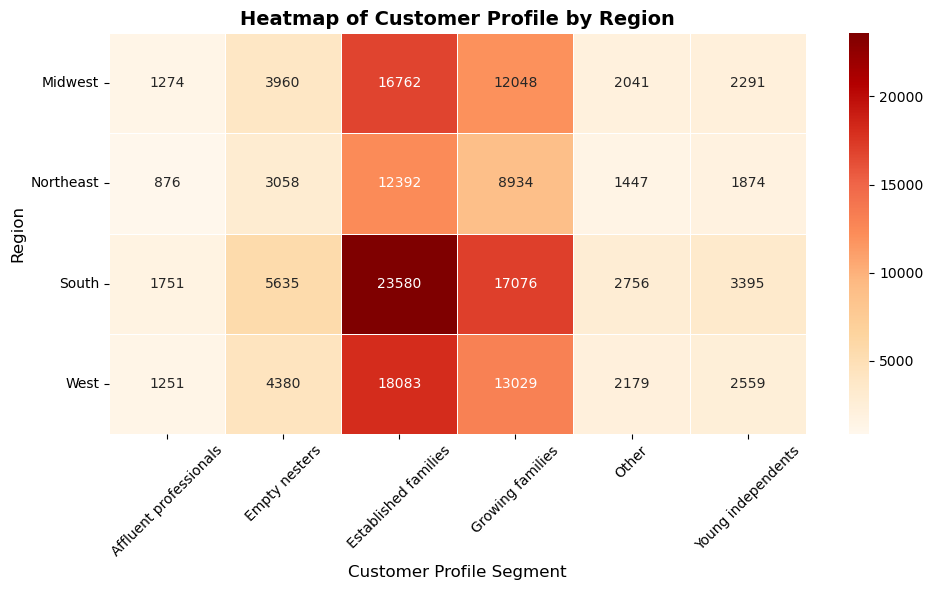

In [331]:


# Create cross tab of region against profile.

crosstab = pd.crosstab(unique_customers_2['region'], unique_customers_2['profile_4'] ,dropna = False)


# Create a heatmap from the crosstab
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(crosstab, annot=True, fmt='d', cmap='OrRd', linewidths=.5)

plt.title('Heatmap of Customer Profile by Region', fontsize=14, fontweight='bold')
plt.ylabel('Region', fontsize=12)
plt.xlabel('Customer Profile Segment', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Save the heatmap
fig = heatmap.get_figure()
fig.savefig(os.path.join(path, '04 Analysis','Visualisations','heatmap_of_profiles_by_region_fix.png'),
            bbox_inches='tight', dpi=300)

#####  The heatmap shows that Established Families followed by the Growing Families profile is the most prevelant in all four regions with the most customers found in the South.

#### f. Orders by Hour of Day per profile and region

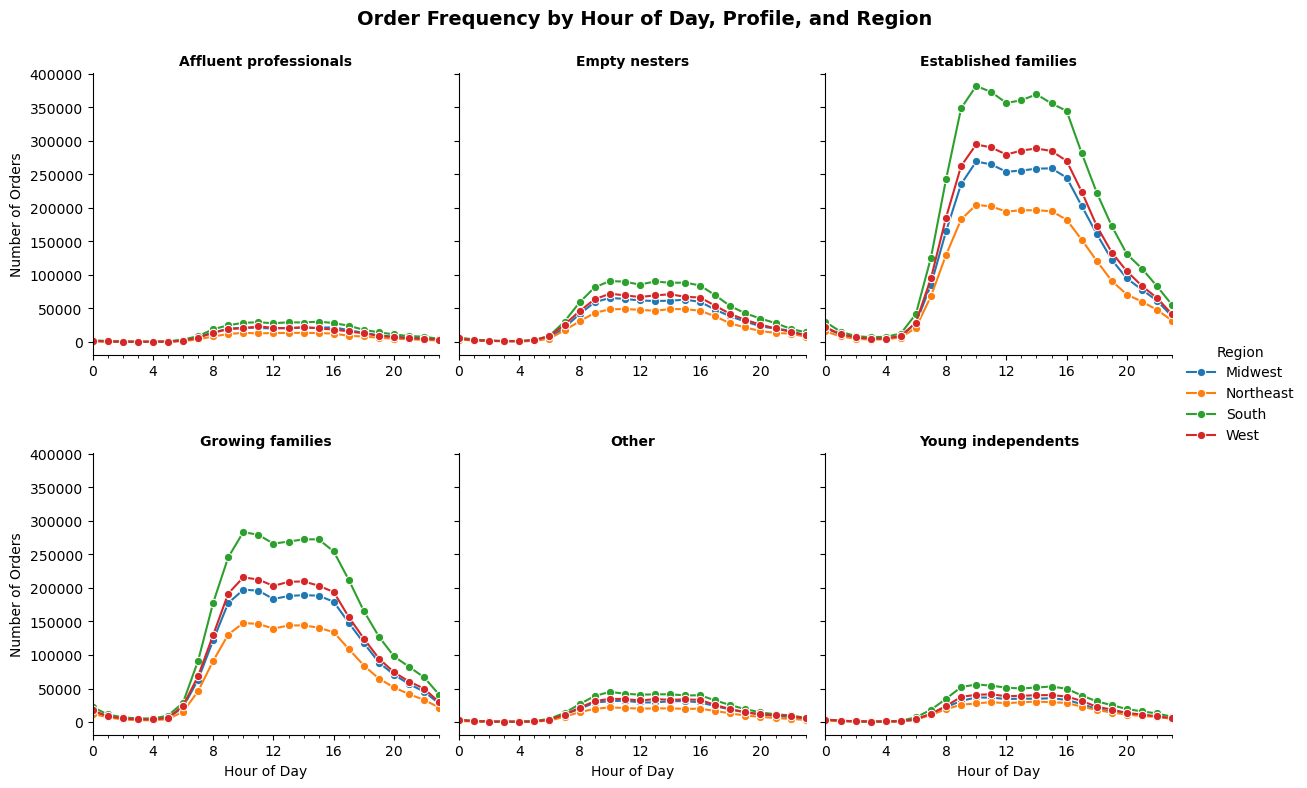

In [220]:
# Draw a line graph showing how each profile varies in the time of day they place orders.

# Group by profile, region, and order_hour_of_day to count frequencies
hourly_counts = (
    ords_prods_cust_high
    .groupby(['profile_4', 'region', 'order_hour_of_day'])
    .size()
    .reset_index(name='count'))

# Plot: one subplot per profile
lines = sns.FacetGrid(hourly_counts, col="profile_4", col_wrap=3, height=4, sharey=True)

lines.map_dataframe(sns.lineplot, x="order_hour_of_day", y="count", hue="region", marker="o")

import matplotlib.ticker as ticker  # we can use this library to control the axis ticks

for ax in lines.axes.flat:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(4))   # labels every 2
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))   # ticks every 1
    ax.set_xlim(0, 23) 
    ax.set_xlabel("Hour of Day")  # force xlabel on all
    ax.tick_params(labelbottom=True)  # force numbers on all

plt.subplots_adjust(hspace=0.35)  # make more space between the top and bottom graphs

# Adjust legend and titles
lines.add_legend(title="Region")
lines.set_axis_labels("Hour of Day", "Number of Orders")
lines.set_titles("{col_name}",fontsize=12, fontweight="bold")
plt.subplots_adjust(top=0.9)
lines.fig.suptitle("Order Frequency by Hour of Day, Profile, and Region", fontsize=14, fontweight="bold")

# Save the image
lines.fig.savefig(os.path.join(path, '04 Analysis','Visualisations', 'order_patterns_throughout_day_absolute.png'),
                  bbox_inches='tight', dpi=300)

plt.show()

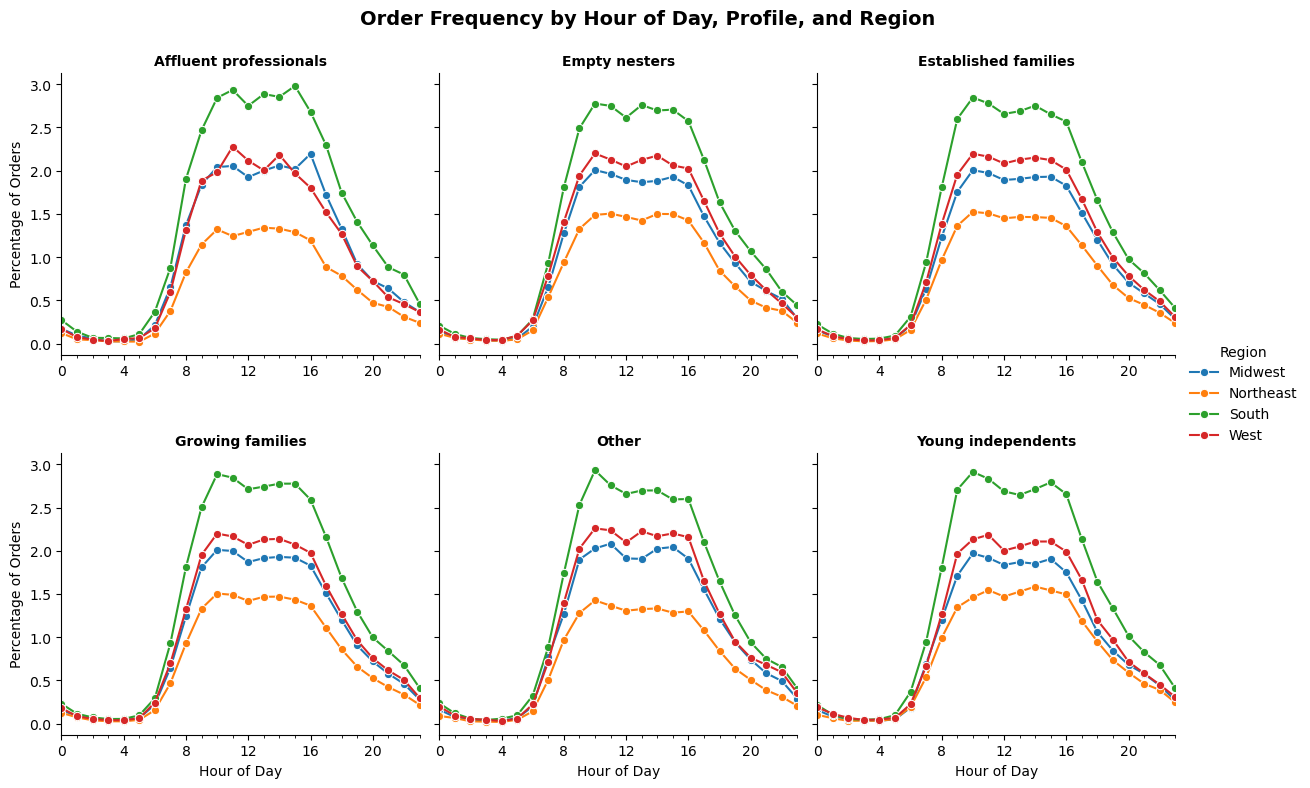

In [267]:
#  Show the percentage of sales rather than absolute values


# Group by profile, region, and order_hour_of_day to count frequencies
hourly_counts = (ords_prods_cust_high.groupby(['profile_4', 'region', 'order_hour_of_day']).size().reset_index(name='count'))

# Normalise within each profile
hourly_counts['percent'] = (hourly_counts.groupby('profile_4')['count'].transform(lambda x: x / x.sum() * 100))

# Plot: one subplot per profile, use seaborn this time.
lines = sns.FacetGrid(hourly_counts, col="profile_4", col_wrap=3, height=4, sharey=True)

lines.map_dataframe(sns.lineplot, x="order_hour_of_day", y="percent", hue="region", marker="o")

import matplotlib.ticker as ticker  # we can use this library to control the axis ticks

for ax in lines.axes.flat:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(4))   # labels every 2
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))   # ticks every 1
    ax.set_xlim(0, 23) 
    ax.set_xlabel("Hour of Day")  # force xlabel on all
    ax.tick_params(labelbottom=True)  # force numbers on all

plt.subplots_adjust(hspace=0.35)  # make more space between the top and bottom graphs

# Adjust legend and titles
lines.add_legend(title="Region")
lines.set_axis_labels("Hour of Day", "Percentage of Orders")
lines.set_titles("{col_name}",fontsize=12, fontweight="bold")
plt.subplots_adjust(top=0.9)
lines.fig.suptitle("Order Frequency by Hour of Day, Profile, and Region", fontsize=14, fontweight="bold")

# Save the image
lines.fig.savefig(os.path.join(path, '04 Analysis','Visualisations',
                           'order_patterns_throughout_day_percentage.png'),
              bbox_inches='tight', dpi=300)

plt.show()

##### We see similar ordering patterns throughout the day from all profile groups however we notice that Young independents and Affluent professionals are more likely to order towards the end of the work day whereas for families both established and growing, the most common time to place their order is around 9am.

#### g. Orders by Hour of Day per loyalty group

In [312]:
# Group order_id to keep one row per order
unique_orders = (ords_prods_cust_high[['order_id','order_hour_of_day','profile_4','loyalty_flag']].drop_duplicates())

unique_orders.head()

,order_id,order_hour_of_day,profile_4,loyalty_flag
0,2539329,8,Growing families,New customer
5,2398795,7,Growing families,New customer
11,473747,12,Growing families,New customer
16,2254736,7,Growing families,New customer
21,431534,15,Growing families,New customer


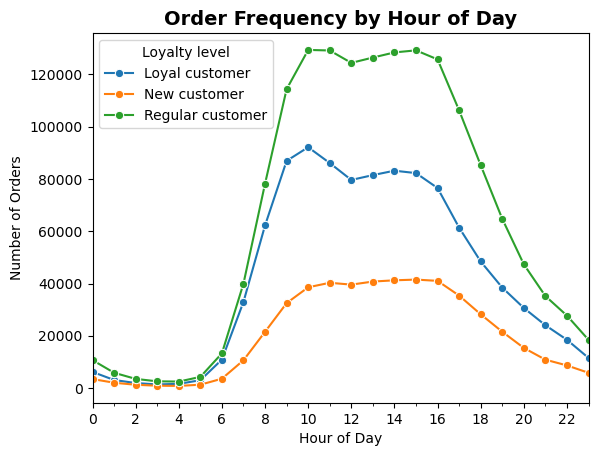

In [314]:
# Draw a line graph showing how each profile varies by the time of day they place orders.


# Group by profile, region, and order_hour_of_day to count frequencies
hourly_counts = (
    unique_orders
    .groupby(['loyalty_flag', 'order_hour_of_day'])
    .size()
    .reset_index(name='count'))

# Plot: one subplot per profile
lines = sns.lineplot(
             data=hourly_counts,
             x="order_hour_of_day", 
             y="count", 
             hue="loyalty_flag", 
             marker="o")

import matplotlib.ticker as ticker  # we can use this library to control the axis ticks

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))   # show labels every 2 hours
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))   # ticks every hour
ax.set_xlim(0, 23)


# Titles and labels
plt.title("Order Frequency by Hour of Day", fontsize=14, fontweight="bold")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.legend(title="Loyalty level")

# Save the image
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'order_patterns_throughout_day_absolute_by_loyalty_fix2.png'),
                  bbox_inches='tight', dpi=300)

plt.show()

In [222]:
# Recheck the columns to see which ones we need 

ords_prods_cust_high.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'merge_status', 'price_range_loc',
       'busiest_day', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_item_price', 'spender_flag', 'median_days_since_prior_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependents', 'marital_status', 'income', '_merge', 'region',
       'activity_flag', 'profile_4'],
      dtype='object')

#### h. Mean spend per visit by loyalty group

In [223]:
#  Calculate cost per visit per user per order

cost_per_visit = (ords_prods_cust_high.groupby(['user_id', 'order_number'])['prices']
                  .sum().reset_index(name='cost_per_visit'))

cost_per_visit

,user_id,order_number,cost_per_visit
0,1,1,31.6
1,1,2,35.4
2,1,3,28.2
3,1,4,26.0
4,1,5,57.0
...,...,...,...
3064370,206209,9,26.2
3064371,206209,10,64.7
3064372,206209,11,56.1
3064373,206209,12,131.5


In [224]:
#  Create a unique loyalty flag per user

user_loyalty = ords_prods_cust_high[['user_id', 'loyalty_flag']].drop_duplicates()

In [225]:
user_loyalty

,user_id,loyalty_flag
0,1,New customer
59,2,Regular customer
254,3,Regular customer
342,4,New customer
411,7,Regular customer
...,...,...
32403340,206203,New customer
32403545,206206,Loyal customer
32403830,206207,Regular customer
32404053,206208,Loyal customer


In [226]:
# Merge cost_per_visit and user_loyalty using 'user_id' column.

cost_per_visit = cost_per_visit.merge(user_loyalty, on='user_id', how='left')

cost_per_visit

,user_id,order_number,cost_per_visit,loyalty_flag
0,1,1,31.6,New customer
1,1,2,35.4,New customer
2,1,3,28.2,New customer
3,1,4,26.0,New customer
4,1,5,57.0,New customer
...,...,...,...,...
3064370,206209,9,26.2,Regular customer
3064371,206209,10,64.7,Regular customer
3064372,206209,11,56.1,Regular customer
3064373,206209,12,131.5,Regular customer


In [227]:
# Calculate mean cost per visit by loyalty group and name column mean_cost_per_visit

mean_cost_per_loyalty = (cost_per_visit.groupby('loyalty_flag')['cost_per_visit'].mean().reset_index()
                         .rename(columns={'cost_per_visit': 'mean_cost_per_visit'}))

print(mean_cost_per_loyalty.round(2))

       loyalty_flag  mean_cost_per_visit
0    Loyal customer                78.02
1      New customer                76.98
2  Regular customer                79.70


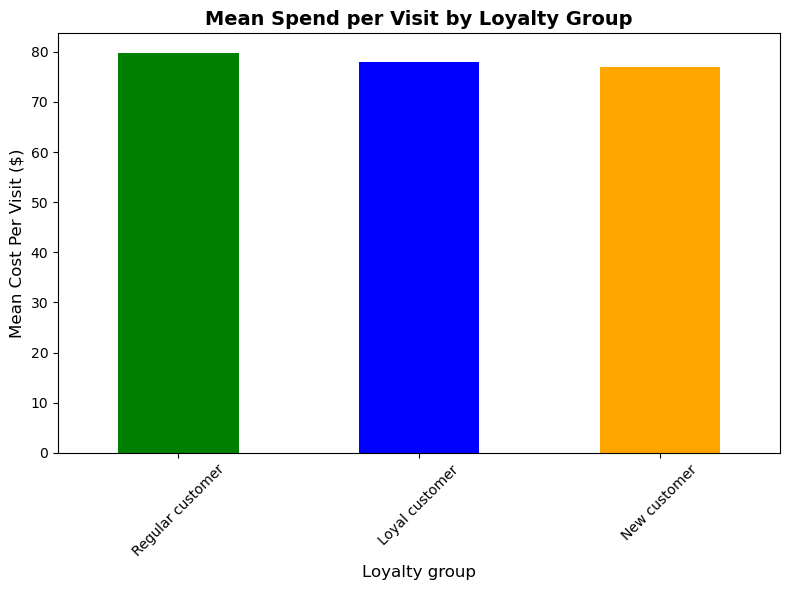

In [327]:
# Plot bar graph showing these results

# Put values in ascending order
mean_cost_per_loyalty = mean_cost_per_loyalty.sort_values('mean_cost_per_visit',ascending=False)

# Generate colours
# colors = plt.cm.Blues(np.linspace(0.9, 0.3, len(mean_cost_per_loyalty)))

# Plot bar chart
bar_6 = mean_cost_per_loyalty.plot.bar(
    x= 'loyalty_flag',
    y= 'mean_cost_per_visit',
    color=['green','blue','orange'],
    legend = False,
    figsize = (8,6))
    

plt.title('Mean Spend per Visit by Loyalty Group', fontsize=14, fontweight='bold')
plt.ylabel('Mean Cost Per Visit ($)', fontsize=12)
plt.xlabel('Loyalty group', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Save bar chart
fig =bar_6.get_figure()
fig.savefig(os.path.join(path, '04 Analysis','Visualisations','Mean_spend_by_loyalty_fix.png'),
            bbox_inches='tight', dpi=300)

plt.show()

#### i. Loyalty group frequencies 

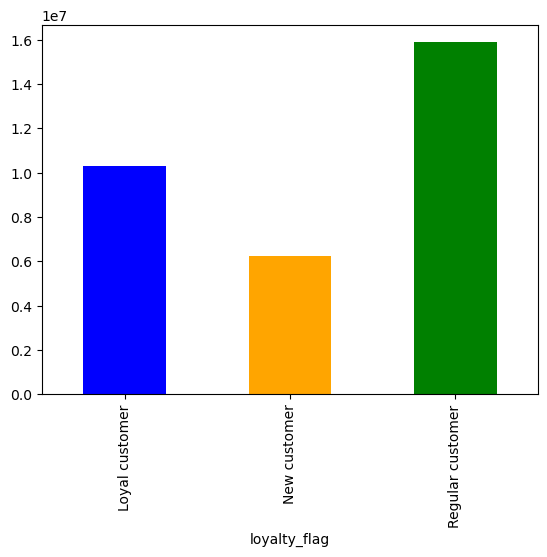

In [229]:
# Recreate earlier Loyalty flag bar chart so that the colours are consistent

bar_7 = ords_prods_cust['loyalty_flag'].value_counts().sort_index().plot.bar(color=['blue','orange','green'])

# Save bar chart
fig =bar_7.get_figure()
fig.savefig(os.path.join(path, '04 Analysis','Visualisations','Loyalty_bar3.png'),
            bbox_inches='tight', dpi=300)

#### j. Mean spend per order by profile and region

In [231]:
#  Recreate Average Spending by Region from earlier but find mean amount spent per visit.

#  Work out the total amount spent for each customer

mean_customer_spend = ords_prods_cust_high.groupby(['user_id','order_number'])['prices'].sum().reset_index()

In [232]:
mean_customer_spend

,user_id,order_number,prices
0,1,1,31.6
1,1,2,35.4
2,1,3,28.2
3,1,4,26.0
4,1,5,57.0
...,...,...,...
3064370,206209,9,26.2
3064371,206209,10,64.7
3064372,206209,11,56.1
3064373,206209,12,131.5


In [233]:
user_spend = ords_prods_cust_high[['user_id', 'region','profile_4']].drop_duplicates()

user_spend

,user_id,region,profile_4
0,1,South,Growing families
59,2,West,Established families
254,3,West,Growing families
342,4,South,Growing families
411,7,Northeast,Growing families
...,...,...,...
32403340,206203,South,Established families
32403545,206206,West,Growing families
32403830,206207,Midwest,Established families
32404053,206208,Midwest,Established families


In [235]:
# Merge mean_customer_spend and user_spend using 'user_id' column.

mean_customer_spend = mean_customer_spend.merge(user_spend, on='user_id', how='left')

mean_customer_spend

,user_id,order_number,prices,region,profile_4
0,1,1,31.6,South,Growing families
1,1,2,35.4,South,Growing families
2,1,3,28.2,South,Growing families
3,1,4,26.0,South,Growing families
4,1,5,57.0,South,Growing families
...,...,...,...,...,...
3064370,206209,9,26.2,Midwest,Established families
3064371,206209,10,64.7,Midwest,Established families
3064372,206209,11,56.1,Midwest,Established families
3064373,206209,12,131.5,Midwest,Established families


In [236]:
# Calculate mean cost per visit by profile and region and name column mean_cost_per_visit

mean_spend_by_groups = (mean_customer_spend.groupby(['profile_4', 'region'])['prices'].mean().reset_index()
                        .rename(columns={'prices': 'mean_spend_per_visit'}))
                         
print(mean_spend_by_groups.round(2))



                 profile_4     region  mean_spend_per_visit
0   Affluent professionals    Midwest                 83.87
1   Affluent professionals  Northeast                 77.95
2   Affluent professionals      South                 84.05
3   Affluent professionals       West                 81.92
4            Empty nesters    Midwest                 80.20
5            Empty nesters  Northeast                 77.47
6            Empty nesters      South                 78.42
7            Empty nesters       West                 79.46
8     Established families    Midwest                 78.17
9     Established families  Northeast                 79.45
10    Established families      South                 78.03
11    Established families       West                 78.62
12        Growing families    Midwest                 79.30
13        Growing families  Northeast                 78.66
14        Growing families      South                 79.43
15        Growing families       West   

In [237]:
# Create pivot for use in bar chart

mean_spend_pivot = mean_spend_by_groups.pivot(index='region', columns='profile_4', values='mean_spend_per_visit')

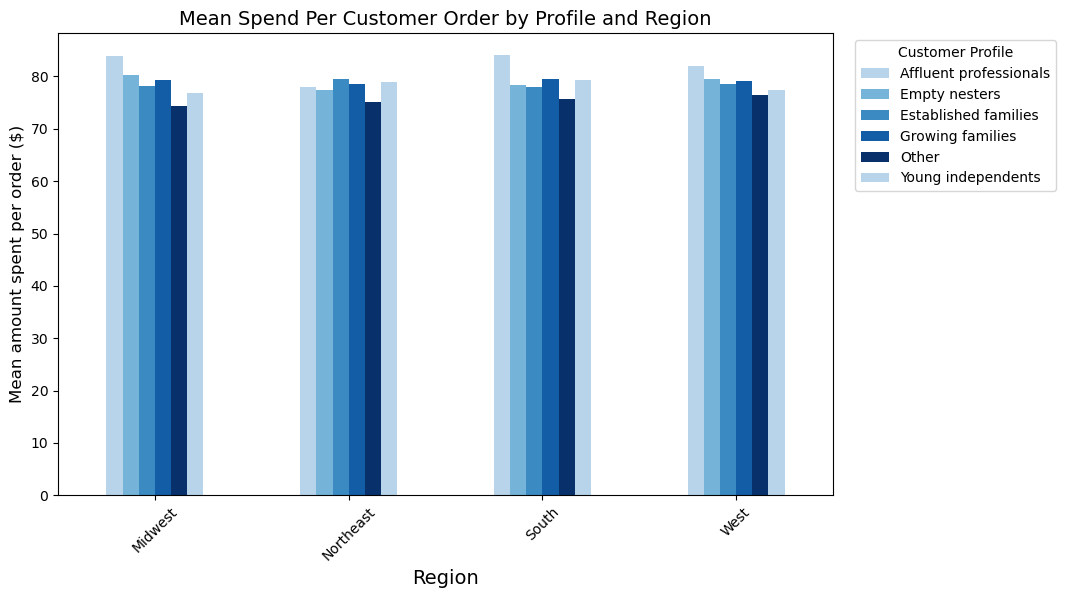

In [238]:
# Plot bar chart of Average spending by Profile and Region

# Create colour palette for bars
colors = plt.cm.Blues(np.linspace(0.3, 1.0, 5))

mean_spend_pivot.plot.bar(color=colors, figsize=(10,6))

plt.title("Mean Spend Per Customer Order by Profile and Region",fontsize="14")
plt.ylabel("Mean amount spent per order ($)",fontsize="12")
plt.xlabel("Region",fontsize="14")
plt.xticks(rotation=45)
plt.legend(title="Customer Profile", loc='upper left', bbox_to_anchor=(1.02, 1))

# Save the bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualisations','mean_spend_by_profile_and_region_fix.png'),
            bbox_inches='tight', dpi=300)

plt.show()


#### k. Median Spend per order by profile and region

In [239]:
# Repeat this process for the median spend per visit

median_spend_by_groups = (mean_customer_spend.groupby(['profile_4', 'region'])['prices'].median().reset_index()
                        .rename(columns={'prices': 'median_spend_per_visit'}))
                         
print(median_spend_by_groups.round(2))

                 profile_4     region  median_spend_per_visit
0   Affluent professionals    Midwest                   69.55
1   Affluent professionals  Northeast                   65.40
2   Affluent professionals      South                   69.60
3   Affluent professionals       West                   68.40
4            Empty nesters    Midwest                   65.50
5            Empty nesters  Northeast                   64.00
6            Empty nesters      South                   63.50
7            Empty nesters       West                   66.60
8     Established families    Midwest                   63.90
9     Established families  Northeast                   65.10
10    Established families      South                   63.80
11    Established families       West                   64.20
12        Growing families    Midwest                   65.20
13        Growing families  Northeast                   64.50
14        Growing families      South                   65.00
15      

In [240]:
# Create newpivot for use in median bar chart

median_spend_pivot = median_spend_by_groups.pivot(index='region', columns='profile_4', values='median_spend_per_visit')

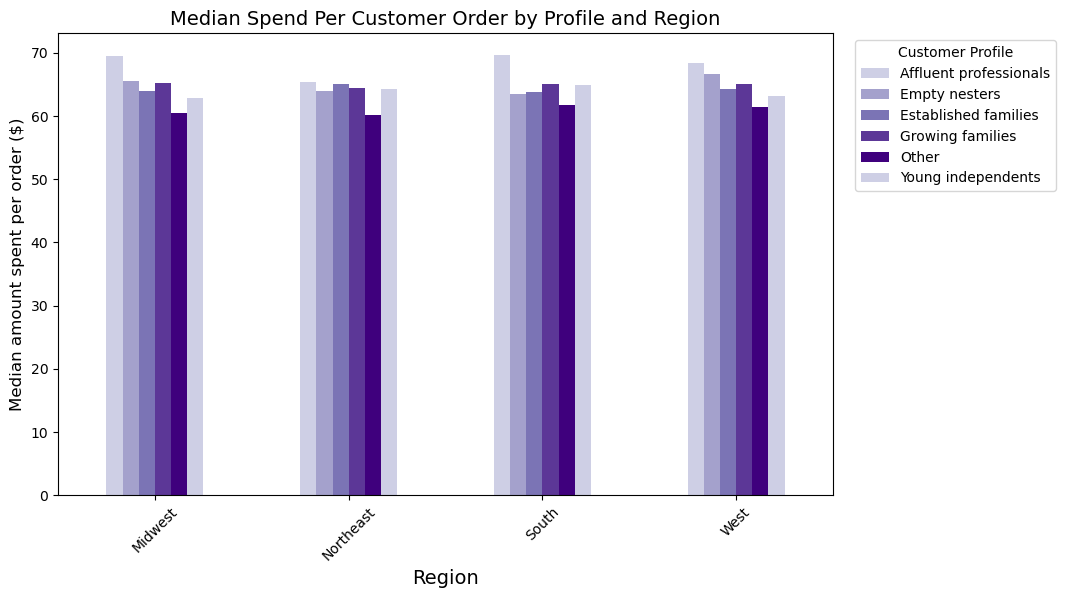

In [241]:
# Plot bar chart of median spend per visit by Profile and Region

# Create colour palette for bars
colors = plt.cm.Purples(np.linspace(0.3, 1.0, 5))

median_spend_pivot.plot.bar(color=colors, figsize=(10,6))

plt.title("Median Spend Per Customer Order by Profile and Region",fontsize="14")
plt.ylabel("Median amount spent per order ($)",fontsize="12")
plt.xlabel("Region", fontsize="14")
plt.xticks(rotation=45)
plt.legend(title="Customer Profile", loc='upper left', bbox_to_anchor=(1.02, 1))

# Save the bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualisations','median_spend_by_profile_and_region_fix.png'),
            bbox_inches='tight', dpi=300)

plt.show()


#### l. Relationship between age and spending habits

In [248]:
# Draw a line graph showing how order_hour_of_day varies according to age

# Age vs median order_hour_of_day

# Group by age and calculate median order_hour_of_day
age_hour_median = (ords_prods_cust_high.groupby('age')['order_hour_of_day'].mean().reset_index(name='median_order_hour'))

print(age_hour_median.head(20))




    age  median_order_hour
0    18          13.342909
1    19          13.389554
2    20          13.413275
3    21          13.471203
4    22          13.371326
5    23          13.336911
6    24          13.377682
7    25          13.390591
8    26          13.368712
9    27          13.351896
10   28          13.438990
11   29          13.440507
12   30          13.482912
13   31          13.391813
14   32          13.325291
15   33          13.436012
16   34          13.349485
17   35          13.387988
18   36          13.409537
19   37          13.403677


In [246]:
# Doesn't look like this is going to be a very interesting graph

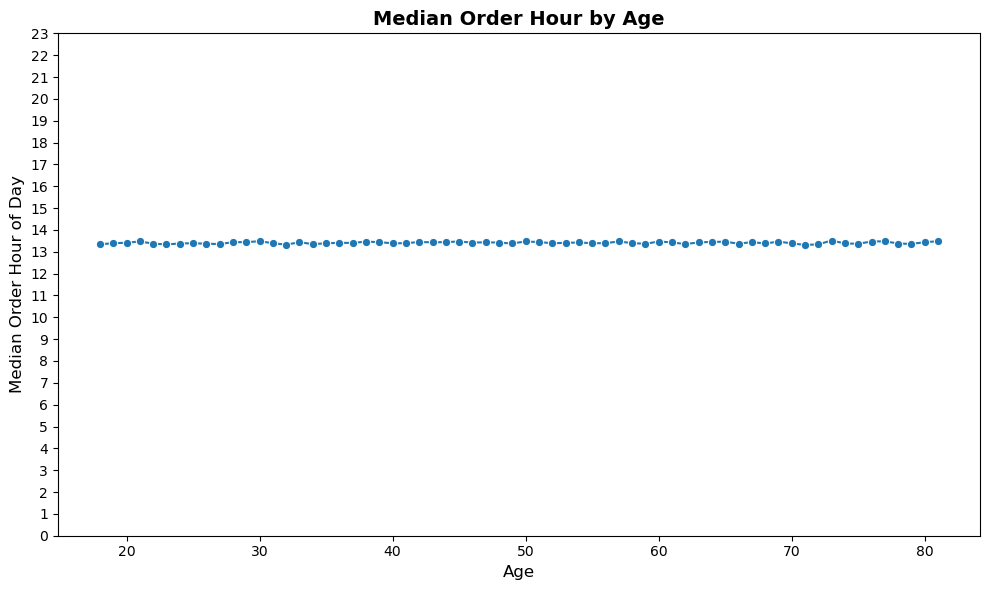

In [249]:
# Draw line graph
plt.figure(figsize=(10,6))
sns.lineplot(data=age_hour_median, x='age', y='median_order_hour', marker="o")

plt.title("Median Order Hour by Age", fontsize=14, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Median Order Hour of Day", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(range(0,24))  # force hours to show 0–23
plt.tight_layout()

# Save the image
plt.savefig(os.path.join(path, '04 Analysis','Visualisations', 'age_vs_median_order_hour.png'),
                  bbox_inches='tight', dpi=300)

plt.show()

In [251]:
# This just implies that people of all ages order their groceries at all different times of the day

In [ ]:
# Let's try to visualise this in a different way.  Create age groups:

In [252]:
ords_prods_cust_high['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [254]:
ords_prods_cust_high.loc[
    (ords_prods_cust_high['age'] >= 18) & (ords_prods_cust_high['age'] <= 25),'age_group'] = '18-25'

In [255]:
ords_prods_cust_high.loc[
    (ords_prods_cust_high['age'] >= 26) & (ords_prods_cust_high['age'] <= 35),'age_group'] = '26-35'

In [256]:
ords_prods_cust_high.loc[
    (ords_prods_cust_high['age'] >= 36) & (ords_prods_cust_high['age'] <= 45),'age_group'] = '36-45'

In [257]:
ords_prods_cust_high.loc[
    (ords_prods_cust_high['age'] >= 46) & (ords_prods_cust_high['age'] <= 55),'age_group'] = '46-55'

In [258]:
ords_prods_cust_high.loc[
    (ords_prods_cust_high['age'] >= 56) & (ords_prods_cust_high['age'] <= 65),'age_group'] = '56-65'

In [259]:
ords_prods_cust_high.loc[
    ords_prods_cust_high['age'] >= 66,'age_group'] = '65+'

In [264]:
ords_prods_cust_high['age_group'].value_counts(dropna=False)

age_group
65+      7730834
46-55    4889209
26-35    4874287
36-45    4828252
56-65    4777464
18-25    3864518
Name: count, dtype: int64

In [317]:
# Drop duplicate order_id rows so each order is only counted once

orders_only = ords_prods_cust_high[['order_id','age_group','order_hour_of_day']].drop_duplicates()


In [318]:
orders_only.shape

(3064375, 3)

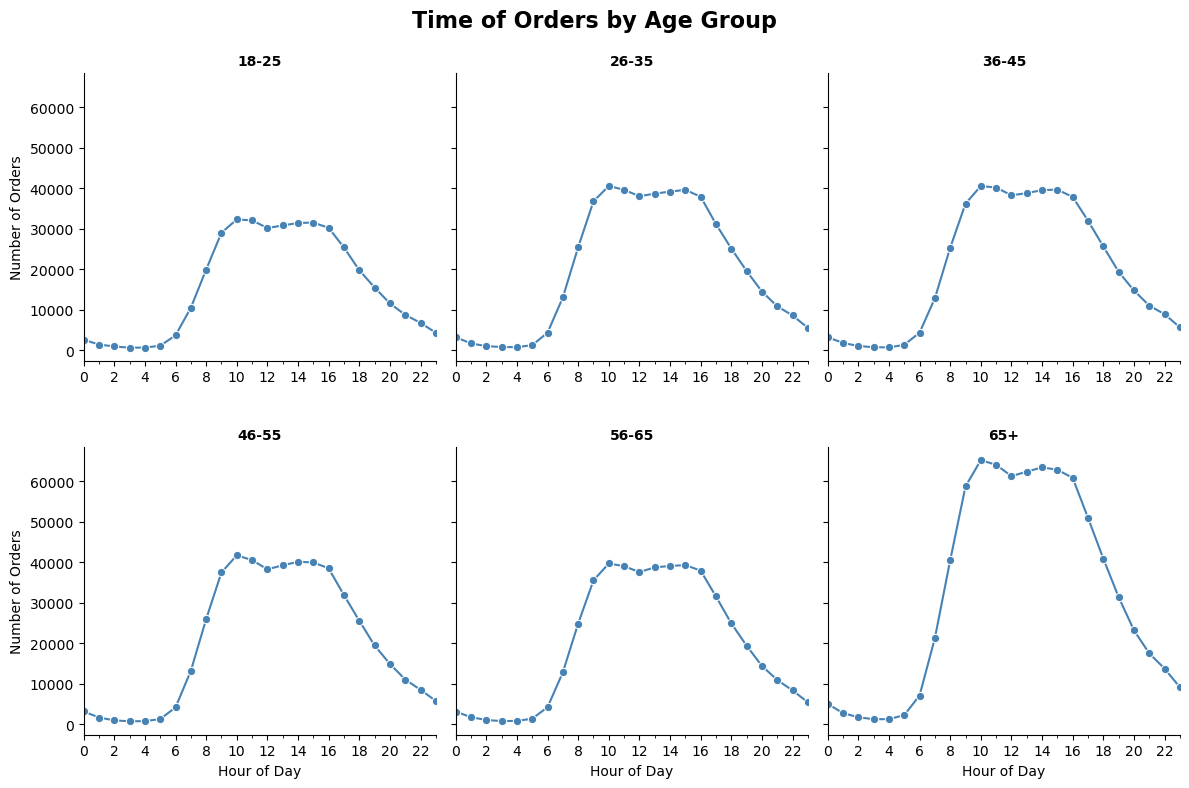

In [320]:

# Group by age_group and order_hour_of_day, count unique orders.
orders_by_hour = (
    orders_only
    .groupby(['age_group', 'order_hour_of_day'])['order_id']
    .nunique()
    .reset_index(name='order_count'))

# Plot line graphs with FacetGrid
lines_2 = sns.FacetGrid(
    orders_by_hour,
    col="age_group",
    col_wrap=3,
    height=4,
    sharey=True,
    sharex=True)


for ax in lines_2.axes.flat:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))   # labels every 2
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))   # ticks every 1
    ax.set_xlim(0, 23) 
    ax.set_xlabel("Hour of Day")  # force x-label on all
    ax.tick_params(labelbottom=True)  # force numbers on all

plt.subplots_adjust(hspace=0.35)  # make more space between the top and bottom graphs


lines_2.map_dataframe(
    sns.lineplot,
    x="order_hour_of_day",
    y="order_count",
    marker="o",
    color="steelblue"
)

# Step 4: Labels and titles
lines_2.set_axis_labels("Hour of Day", "Number of Orders")
lines_2.set_titles("{col_name}",fontsize=14, fontweight="bold")


plt.subplots_adjust(top=0.9, hspace=0.3)
lines_2.fig.suptitle("Time of Orders by Age Group", fontsize=16, fontweight="bold")


# Save the image
lines_2.fig.savefig(os.path.join(path, '04 Analysis','Visualisations', 'order_hour_of_day_age_groups_fix.png'),
                  bbox_inches='tight', dpi=300)

plt.show()



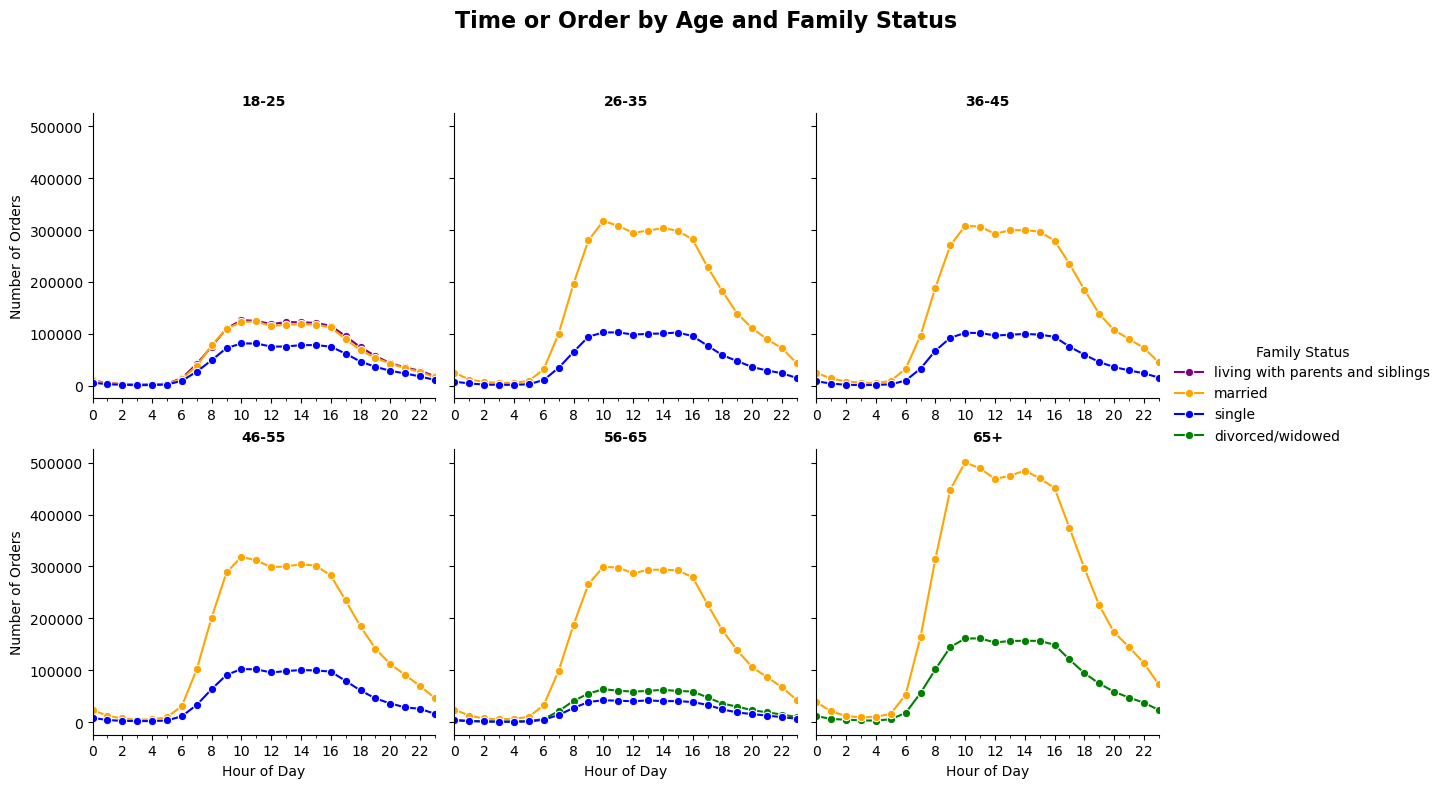

In [322]:
# Now we can also draw this split up by family_status

# Group by age_group, family status, and order_hour_of_day
hourly_family_counts = (
    ords_prods_cust_high
    .groupby(['age_group', 'marital_status', 'order_hour_of_day'])
    .size()
    .reset_index(name='count'))

status_palette = {'single': 'blue','married': 'orange', 'divorced/widowed': 'green','living with parents and siblings':'purple'}

# Plot with FacetGrid: one facet per age_group, line per family status
g = sns.FacetGrid(
    hourly_family_counts,
    col="age_group",
    col_wrap=3,
    height=4,
    sharey=True)

# Formatting the axes
import matplotlib.ticker as ticker
for ax in g.axes.flat:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))   # labels every 2
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))   # ticks every 1
    ax.set_xlim(0, 23)
    ax.set_xlabel("Hour of Day")
    ax.tick_params(labelbottom=True)

plt.subplots_adjust(hspace=0.5)  # make more space between the top and bottom graphs

g.map_dataframe(
    sns.lineplot,
    x="order_hour_of_day",
    y="count",
    hue="marital_status",
    palette=status_palette,
    marker="o")


# Adjust titles and legend
g.add_legend(title="Family Status")
g.set_axis_labels("Hour of Day", "Number of Orders")
g.set_titles("{col_name}", fontsize=14, fontweight="bold")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Time or Order by Age and Family Status", fontsize=16, fontweight="bold")

# Save the figure
g.fig.savefig(os.path.join(path, '04 Analysis','Visualisations',
                           'order_patterns_by_time_age_family.png'),
              bbox_inches='tight', dpi=300)

plt.show()

In [283]:
ords_prods_cust_high['marital_status'].value_counts()

marital_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

#### m. Remaking items sold vs hour_of_day histogram to add axis labels 

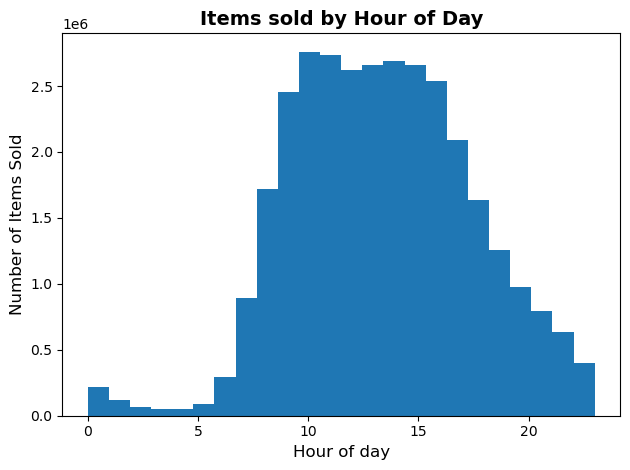

In [329]:
# Create histogram of items sold by hour_of_day

hist = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 24)

plt.title('Items sold by Hour of Day', fontsize=14, fontweight='bold')
plt.ylabel('Number of Items Sold', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()

# Save bar chart
fig =hist.get_figure()
fig.savefig(os.path.join(path, '04 Analysis','Visualisations','Hist_orders_hour_of_day_fix.png'),
            bbox_inches='tight', dpi=300)

plt.show()